In [30]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [6]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [7]:
# from IPython.display import  Image

# @interact
# def show_img(file=os.listdir('/content/opencv_snipps/imgs/')):
#   display(Image('/content/opencv_snipps/imgs/'+file))

In [8]:
print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

OpenCV-Python Lib Version: 4.1.0
Python Version: 3.6.7 | packaged by conda-forge | (default, Feb 20 2019, 02:51:38) 
[GCC 7.3.0]


In [14]:
# !git clone https://github.com/MeAmarP/sample_imgs.git
os.listdir(os.path.join(os.getcwd(), 'sample_imgs'))

['fruitbowl_rgb.jpg',
 'lena_gry.bmp',
 'Wb_girl_rgb.jpg',
 'tank_gry.tiff',
 'skittle_rgb.tiff',
 'lun1_rgb.gif',
 'cells_bin.png',
 'alg_gry.jpg',
 '.git',
 'bricks_in_wall_bin.tiff']


## 1. Basic I/0: Understand Image and its Represenations in OpenCV
### Types of Images:
+ Binary : 2D Array of pixels,where Pixel Value is either 0 or 255.
+ Grayscale : 2D Array of pixels,where Pixel Value is anything between 0-255 
+ RGB/TrueColor : 3D Array of pixels,where Pixel Value is anything between 0-255 

Note: RGB pixel format is quit standard among MATLAB or other image processing liberaies, but OpenCV uses BGR pixel format.

In [20]:
MainImgBin = cv2.imread('sample_imgs/cells_bin.png',cv2.IMREAD_UNCHANGED)
MainImgBGR = cv2.imread('sample_imgs/fruitbowl_rgb.jpg',cv2.IMREAD_UNCHANGED)
MainImgGray = cv2.imread('sample_imgs/alg_gry.jpg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)
print('Shape/Size of Gray Img:', MainImgGray.shape)
print('Shape/Size of Binary Img:', MainImgBin.shape)

# Why use cv2.IMREAD_UNCHANGED with IMREAD?
# https://stackoverflow.com/a/18871394
# https://docs.opencv.org/3.4.3/d4/da8/group__imgcodecs.html#gga292d81be8d76901bff7988d18d2b42acae80c3e72393ec86b8ea1db4a2a228b5f

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (625, 960, 3)
Shape/Size of Gray Img: (512, 512)
Shape/Size of Binary Img: (476, 638, 3)


In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='c')
plt.subplot(1,3,2)
plt.imshow(MainImgGray,cmap='gray')
plt.title('Grayscale Image',color='c')
plt.subplot(1,3,3)
plt.imshow(MainImgBin)
plt.title('Binary Image',color='c')
plt.show()

## 2. Basic Operations:
    - Convert to Gray/Binary
    - Change Colorspaces
    - Resize
    - Flip
    - Rotate
    - Crop

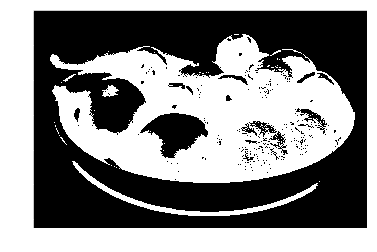

In [21]:
#Convert to Gray
img_gry = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2GRAY)

#Convert to Binary
# Method: Basic Thresholding
ret,img_bin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY)
ret,img_bininv = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY_INV)

# Method: Adaptive Thresholding
img_adp_gusbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,5)
img_adp_meanbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)

# Method: Otsu's Thresholding
ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_Otsubin,cmap='binary')

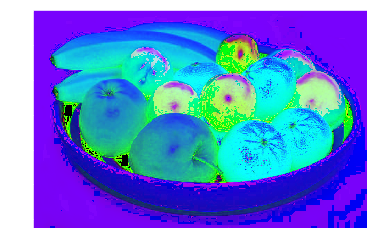

In [22]:
#Changing Color Spaces
img_hls = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2YUV)
plt.imshow(img_hsv)

Before Resize:  (625, 960)
After Resize 1:  (400, 400)
After Resize 2:  (400, 800)


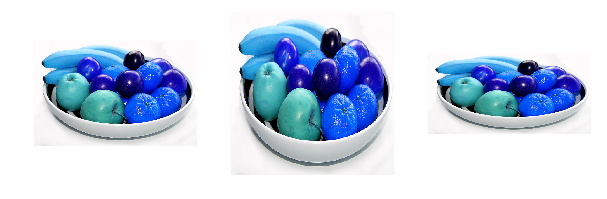

In [24]:
# Resize the image
IMG_WIDTH = 400
IMG_HEIGHT = 400
img = cv2.imread('sample_imgs/fruitbowl_rgb.jpg')
print('Before Resize: ',img.shape[:2])

#Try Other Interploation Methods too
re1_img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv2.INTER_LANCZOS4)
re2_img = cv2.resize(img,(IMG_WIDTH*2,IMG_HEIGHT),interpolation=cv2.INTER_AREA)
print('After Resize 1: ',re1_img.shape[:2])
print('After Resize 2: ',re2_img.shape[:2])
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(re1_img)
plt.subplot(1,3,3)
plt.imshow(re2_img)
plt.show()

In [26]:
# Flip/Rotate Images

@interact_manual(angle_val=widgets.IntSlider(min=0, max=360, step=5, value=10))
def rotate_img(angle_val):
    path_to_grayscale_img = 'sample_imgs/lena_gry.bmp'
    scaleFactor = 1
    img = cv2.imread(path_to_grayscale_img,cv2.IMREAD_UNCHANGED)
    rows,cols = img.shape
    imgCenter = (cols-1)/2.0,(rows-1)/2.0
    #Calculate an affine matrix of 2D rotation. 
    rotateMat = cv2.getRotationMatrix2D(imgCenter,angle_val,scaleFactor)
    # Apply an affine transformation to an image. 
    out_img = cv2.warpAffine(img,rotateMat,(cols,rows))
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1), plt.imshow(img,cmap='gray') ,plt.title('Original Image',color='c')
    plt.subplot(1,2,2), plt.imshow(out_img,cmap='gray'), plt.title('Rotated Image',color='c')
    plt.show()

interactive(children=(IntSlider(value=10, description='angle_val', max=360, step=5), Button(description='Run I…

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7b3ee34160>,
 Text(0.5, 1.0, 'Cropped'))

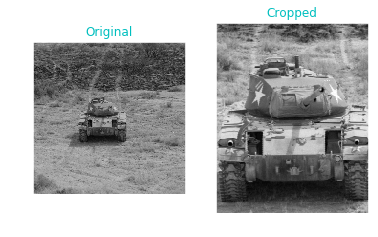

In [27]:
#Crop Images
#Note is more about array slicing. refer row & column vals from x,y-axis for ROI.
img = cv2.imread('sample_imgs/tank_gry.tiff',cv2.IMREAD_UNCHANGED)

#Slicing using ROI
cropped = img[150:350,150:310].copy()
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
plt.subplot(122),plt.imshow(cropped,cmap='gray'),plt.title('Cropped',color='c')

In [28]:
#Math_Ops = Add, Subtract, Multiply, Divide
BasicArithOps = ['add','subtract','multiply','divide']

@interact_manual(arith_op=BasicArithOps,para_val=widgets.IntSlider(min=1, max=100, step=1, value=10))
def arithops_on_img(arith_op,para_val):
  img = cv2.imread('sample_imgs/lena_gry.bmp',cv2.IMREAD_UNCHANGED)
  if arith_op == 'add':
    s_img = img + para_val
  elif arith_op == 'subtract':
    s_img = img - para_val
  elif arith_op == 'multiply':
    s_img = img * para_val
  elif arith_op == 'divide':
    #Use Floor Divison operator
    s_img = img // para_val
  plt.figure(figsize=(10,10))
  plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
  plt.subplot(122),plt.imshow(s_img,cmap='gray'),plt.title('Math Operation',color='c')
  plt.show()

# img,s_img = arithops_on_img('add',100)


interactive(children=(Dropdown(description='arith_op', options=('add', 'subtract', 'multiply', 'divide'), valu…

In [0]:
#Logical/Bitwise Operations
path_to_grayscale_img = 'sample_imgs/lena_gry.bmp'
LogicalOps = ['and','or','xor','not']

@interact_manual(logical_op=LogicalOps)
def logicalops_on_img(logical_op):
    img = cv2.imread(path_to_grayscale_img)
    h,w,_ = img.shape
    mask_img = np.concatenate((np.zeros(shape=[h,(w//3),3],dtype=np.uint8),
                              np.ones(shape=[h,(w//3)+2,3],dtype=np.uint8)*127,
                              np.ones(shape=[h,(w//3),3],dtype=np.uint8)*255),
                              axis=1)
    if logical_op == 'and':
        print('Performed Bitwise AND')
        result_img = cv2.bitwise_and(img,mask_img)        
    elif logical_op == 'or':
        print('Performed Bitwise OR')
        result_img = cv2.bitwise_or(img,mask_img)
    elif logical_op == 'xor':
        print('Performed Bitwise XOR')
        result_img = cv2.bitwise_xor(img,mask_img)
    elif logical_op == 'not':
        print('Performed Bitwise NOT')
        result_img = cv2.bitwise_not(img)        
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
    plt.subplot(132),plt.imshow(mask_img,cmap='gray'),plt.title('Mask',color='c')
    plt.subplot(133),plt.imshow(result_img,cmap='gray'),plt.title('Processed Image',color='c')
    plt.show()

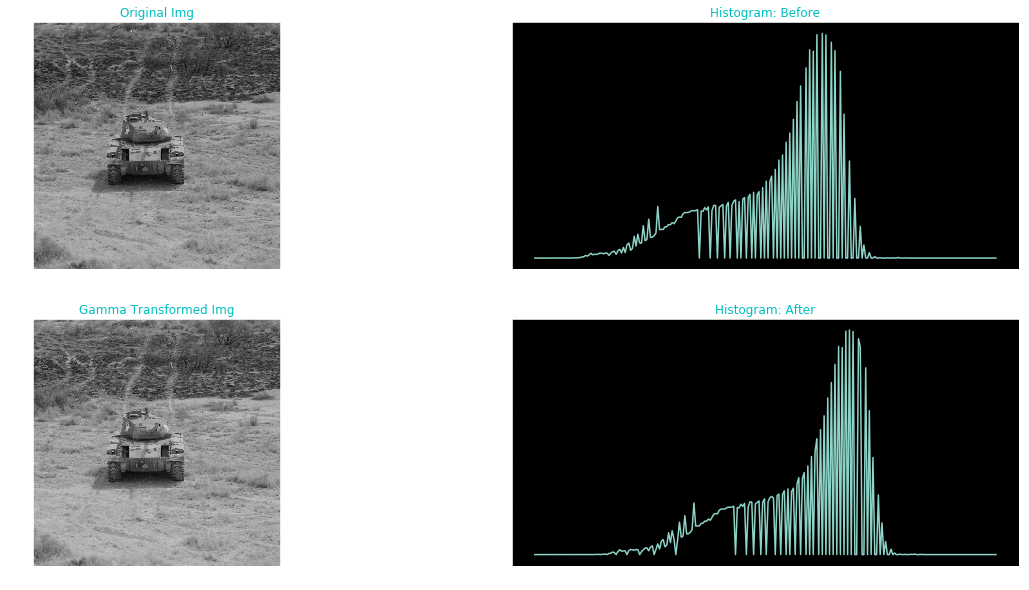

In [32]:
#Display Histogram of Image

path_to_img = 'sample_imgs/tank_gry.tiff'
def applyLogTransform(path_to_img):
    img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
    img_log = np.array(img_log,dtype=np.uint8)
    hist_img_log = cv2.calcHist([img_log],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(img_log,cmap='gray'),plt.title('Log Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_log),plt.title('Histogram: After',color='c')
    plt.show()
    return

#gamma_vals = [0.1, 0.5, 1.2, 2.2]
def applyGammaTransform(path_to_img,gamma_val=None):
    img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    gamma_corrected = np.array(255*(img / 255) ** gamma_val, dtype = 'uint8')
    hist_img_gamma = cv2.calcHist([gamma_corrected],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(gamma_corrected,cmap='gray'),plt.title('Gamma Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_gamma),plt.title('Histogram: After',color='c')
    plt.show()
    return

applyGammaTransform(path_to_img,gamma_val=0.8)




